<a href="https://colab.research.google.com/github/asadpro/Tensorflow-Day-to-Day-Practice/blob/main/Day_4_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size=6 color='red'> Training larger Dataset and showing it using Matplotlib
<hr>
<img src='https://lifewithdata.com/wp-content/uploads/2022/03/matplotlib_logo.jpeg' width=500>

In [ ]:
# showing dataset using simple plot method
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np

- <font size=5> To read the dataset directly go to the github page of that dataset then select dataset and click raw button of the dataset. It will generate a link like below from where we can read the file.

# <font color='FFD700'>**Step 1: Reading Dataset**

In [ ]:
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/credit.csv')
insurance.head(10)

# from google.colab import files
# insurance .to_csv('example.csv')
# files.download('example.csv')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


# <font color='FFD700'>**Step 2: One-hot encoding**

In [ ]:
# Converting non-numerical column into numerical form using one-hot encoding because neural network accept only numbers.

insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head(10)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
5,31,25.740,0,3756.62160,1,0,1,0,0,0,1,0
6,46,33.440,1,8240.58960,1,0,1,0,0,0,1,0
7,37,27.740,3,7281.50560,1,0,1,0,0,1,0,0
8,37,29.830,2,6406.41070,0,1,1,0,1,0,0,0
9,60,25.840,0,28923.13692,1,0,1,0,0,1,0,0


## Here we can see the charges column is the target variable

In [ ]:
insurance.head() 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# <font color='FFD700'>**Step 3: Create X & Y values (features and labels)**

In [ ]:
# Create x and y (features and labels)

x_feature = insurance_one_hot.drop('charges',axis=1) 
y_labels = insurance_one_hot['charges']

x_feature.head(3), y_labels.head(3)


(   age    bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0   19  27.90         0           1         0          0           1   
 1   18  33.77         1           0         1          1           0   
 2   28  33.00         3           0         1          1           0   
 
    region_northeast  region_northwest  region_southeast  region_southwest  
 0                 0                 0                 0                 1  
 1                 0                 0                 1                 0  
 2                 0                 0                 1                 0  ,
 0    16884.9240
 1     1725.5523
 2     4449.4620
 Name: charges, dtype: float64)

# <font color='FFD700'>**Step 4: Dividing Dataset into Train-Test-Split**

In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split

x_train,x_test,y_train, y_test = train_test_split(x_feature, y_labels, test_size=0.2,train_size=0.8,random_state=42,shuffle=True) # By default shuffle is True


In [ ]:
len(x_feature), len(x_train),len(x_test)

(1338, 1070, 268)

In [ ]:
# As we can see below index are shuffled
x_train.head(5)

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.95,2,1,0,1,0,0,1,0,0
1285,47,24.32,0,1,0,1,0,1,0,0,0
1142,52,24.86,0,1,0,1,0,0,0,1,0
969,39,34.32,5,1,0,1,0,0,0,1,0
486,54,21.47,3,1,0,1,0,0,1,0,0


In [ ]:
# # converting dataframe object into tensor
# xx_train = tf.convert_to_tensor(x_train)
# yy_train = tf.convert_to_tensor(y_train)

x_train.shape

(1070, 11)

<font color='green' size=5> If we check the type of x_train it would say dataframe. <br>
But why we didn't convert dataframe into tensor and give it directly to the model....<br></font>

<font color='pink' size=4> Because pandas build on numpy and numpy arrays works with tensor that's why our model didn't through any error during training time.


> <font size=6>😏🤔: **Question:** Now the question is for how long should we train our model?<br>
Well it depends on the problem you are working on.</font><br>
<font size=5>😲: one solution for this problem is that Tensorflow have the component called <br>[Early stopping callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) 
This component will stop the model from training once model get stops improving itself further.

# <font color='FFD700'>**Step 5: Building Neural Network model**

In [ ]:

tf.random.set_seed(42)

# Create a model for the above regression problem
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100,activation='relu',name='Input_layer_1'))
model.add(tf.keras.layers.Dense(100,activation='relu',name='Input_layer_2'))
model.add(tf.keras.layers.Dense(1,name='Output_layer'))

# Compiling model
model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=[tf.keras.metrics.mae])

# Fitting model on data
history = model.fit(x_train,y_train,epochs=200,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss',patience=4)],)



Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 11271.2949 - mean_absolute_error: 11271.2949
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 7600.6025 - mean_absolute_error: 7600.6025
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 7290.6577 - mean_absolute_error: 7290.6577
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 7031.3755 - mean_absolute_error: 7031.3755
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 6788.0469 - mean_absolute_error: 6788.0469
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 6486.8984 - mean_absolute_error: 6486.8984
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 6293.2739 - mean_absolute_error: 6293.2739
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 6132.4175 - mean_absolute_error: 6132.4175
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - los

# <font color='FFD700'>**Step 6: Evaluating model performance**

In [ ]:
# Evaluating model on test set
model.evaluate(x_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1974.1788 - mean_absolute_error: 1974.1788


[1974.1788330078125, 1974.1788330078125]

In [ ]:
print('Median is: ',y_train.median())
print('\n**********************\n')
print('Median is: ',y_train.mean())


Median is:  9575.4421

**********************

Median is:  13346.089736364489


# <font color='FFD700'>**Step 7: Loss CURVE Graph**

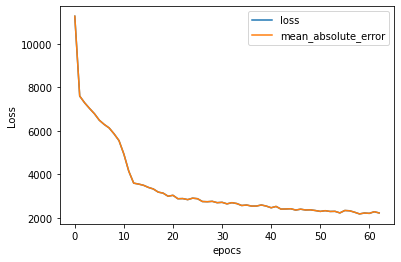

In [ ]:
# Creating model CURVE
pd.DataFrame(history.history).plot()
plt.xlabel('epocs')
plt.ylabel('Loss')
plt.show() 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer_1 (Dense)       (None, 100)               1200      
                                                                 
 Input_layer_2 (Dense)       (None, 100)               10100     
                                                                 
 Output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 11,401
Trainable params: 11,401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
x_feature.head(3)

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.90,0,1,0,0,1,0,0,0,1
1,18,33.77,1,0,1,1,0,0,0,1,0
2,28,33.00,3,0,1,1,0,0,0,1,0


# **Preprocessing data (normalization and standardization):**
<font size=5> 
- Normalization rescale the data where the independent datapoint which are not in the same scale like see below graph some of the values are very high & some are very low. To rescale these type of values in a dataset we need normalization to turns it into 0,1. <br>
  - 🤔 **Question** Now the question is why do we need to rescale the data?
Actually, when we try to train our model like (regression model, neural network) so it need the data point to go steady and to reach minima point of the loss function. </font>


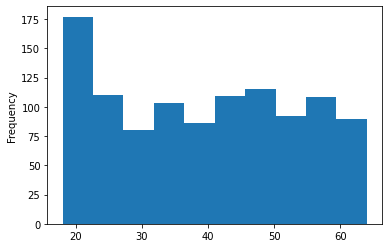

In [ ]:
x_train['age'].plot(kind='hist')

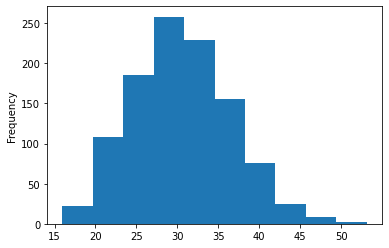

In [ ]:
x_train['bmi'].plot(kind='hist')

In [ ]:
x_feature.head(1333)

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1328,23,24.225,2,1,0,1,0,1,0,0,0
1329,52,38.600,2,0,1,1,0,0,0,0,1
1330,57,25.740,2,1,0,1,0,0,0,1,0
1331,23,33.400,0,1,0,1,0,0,0,0,1


# <font color='FFD700'>**Step 8: Feature Scaling**</font>
Not every dataset required feature scaling. Dataset which has the scaling problem within it like we see the above graph which is up and down and lot so neural network will have a problem in giving the right accuracy because it won't get to minima.

In [ ]:
# Below result shows that 574 peoples have 0 children & 332 peoples have 1 children and so on...
x_feature['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [ ]:
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder



# Reading csv file and counting no of elements in it.

In [ ]:
from google.colab import files
files.upload()

In [ ]:
comp = pd.read_csv('/content/comp_operator.csv')
dlt_column = comp.drop(["Unnamed: 0"	,"Unnamed: 1"	],axis=1)
dlt_column

In [ ]:

education = dlt_column['education'] 
bscs = 0
msc = 0
mcse = 0
others = 0
for count in education:
  
  if (count == 'BS' or count == 'BCS ' or count == 'BCS 'or count == 'BS IT'or count == 'BS(CS)' or count == 'BSIT'):
    bscs +=1
  elif (count == 'msc' or count == 'MSC Computer Science' or  count == 'MSC'):
    msc +=1
  elif (count == 'MCSE' or count == 'MSC Computer Science' or count == 'M.Phil' or count == 'MS'):
    mcse +=1
  else:
    others +=1

print('No of BS computer science are: ',bscs)
print('No of MSc computer science are: ',msc)
print('No of MCS computer science are: ',mcse)
print('No of others program graduates are: ',others)

